# MNIST from First Principles
> A summary of fastai2 Fastbook Chapter 4, from my perspective.

- toc: false 
- badges: true
- comments: true
- author: Paul D
- image: images/2020-04-17-mnist-title.png
- categories: [deep learning, fastai, gradient descent, sgd, mnist]
- hide: false

### Introduction
Whilst the first 3 chapters of Fastbook cover high level overviews of building a model, productionising a model and ethical considerations of data science, from chapter 4 the book starts to take a more in-depth approach to Deep Learning.  

In order to improve my understanding, I decided to rewrite the practical parts of chapters from my own perspective, as I learn. My hope is that these posts will remain succinct in general, closely match the book itself, with room for elaboration for the parts I found most taxing. 

I will then tackle a different problem using the techniques learned in an additional blog post, before moving on to the following chapter.

Anyone who finds this useful, spots mistakes, has advice, etc. I would love to [hear from you](https://www.twitter.com/pdito).

### Getting Started

We'll start the usual way, importing the necessary libraries. The call to matplotlib.rc, simply tells the library to default its image colormap to greyscale. We do this as we are working with MNIST data which is a greyscale image set. It will save us specifying that fact every time we want to visualise our data later using imshow().

In [178]:
from fastai2.vision.all import *
from utils import *

matplotlib.rc('image', cmap='Greys')

The focus of this example is to classify any image as either a 3 or 7. We therefore download fastai's sample of the MNIST data set, which includes numbers from only those categories, represented as 28x28 pixel images.

In [6]:
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

(#3) [Path('/home/pdito/.fastai/data/mnist_sample/train'),Path('/home/pdito/.fastai/data/mnist_sample/valid'),Path('/home/pdito/.fastai/data/mnist_sample/labels.csv')]

From the above we can see we have a training data folder, train and a validation data folder, valid. Below we see that within these folders we have subfolders for our different classes, 3 and 7.

In [8]:
(path/'train').ls()

(#2) [Path('/home/pdito/.fastai/data/mnist_sample/train/3'),Path('/home/pdito/.fastai/data/mnist_sample/train/7')]

Finally, let's take a look inside one of those class folders to understand how the images are named. We sort the ls output here for consistency.

In [10]:
(path/'train/3').ls().sorted()

(#6131) [Path('/home/pdito/.fastai/data/mnist_sample/train/3/10.png'),Path('/home/pdito/.fastai/data/mnist_sample/train/3/10000.png'),Path('/home/pdito/.fastai/data/mnist_sample/train/3/10011.png'),Path('/home/pdito/.fastai/data/mnist_sample/train/3/10031.png'),Path('/home/pdito/.fastai/data/mnist_sample/train/3/10034.png'),Path('/home/pdito/.fastai/data/mnist_sample/train/3/10042.png'),Path('/home/pdito/.fastai/data/mnist_sample/train/3/10052.png'),Path('/home/pdito/.fastai/data/mnist_sample/train/3/1007.png'),Path('/home/pdito/.fastai/data/mnist_sample/train/3/10074.png'),Path('/home/pdito/.fastai/data/mnist_sample/train/3/10091.png')...]

Next, let's create lists to store all the 3s and all the 7s from the training set.

In [11]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()

We can now view the first image from each list, using the Image.open function which is part of the Python Imaging Library, or PIL.

In [12]:
im3 = Image.open(threes[0])
im3

In [13]:
im7 = Image.open(sevens[0])
im7

It's possible to view these numbers as NumPy arrays (or Pytorch tensors) instead, which is how we represent them for the purposes of Machine Learning. 

In the below case we take our 3 image and convert it into an array. We then display a slice of the array (which I selected via trial an error to give a good representation) which you can see almost maps out the shape of the 3. 

Each number here represents a greyscale number, you can think of 0 being black, 255 being white and anything in between representing the ratio (ie. closer to 0 = darker grey).

In [29]:
array(im3)[5:25,9:21]

array([[  0, 103, 242, 254, 254, 254, 254, 254,  66,   0,   0,   0],
       [  0,  18, 232, 254, 254, 254, 254, 254, 238,  70,   0,   0],
       [  0,   0, 104, 244, 254, 224, 254, 254, 254, 141,   0,   0],
       [  0,   0,   0, 207, 254, 210, 254, 254, 254,  34,   0,   0],
       [  0,   0,   0,  84, 206, 254, 254, 254, 254,  41,   0,   0],
       [  0,   0,   0,   0,  24, 209, 254, 254, 254, 171,   0,   0],
       [  0,   0,   0,  91, 137, 253, 254, 254, 254, 112,   0,   0],
       [  0,  40, 214, 250, 254, 254, 254, 254, 254,  34,   0,   0],
       [  0,  81, 247, 254, 254, 254, 254, 254, 254, 146,   0,   0],
       [  0,   0, 110, 246, 254, 254, 254, 254, 254, 171,   0,   0],
       [  0,   0,   0,  73,  89,  89,  93, 240, 254, 171,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1, 128, 254, 219,  31,   0],
       [  0,   0,   0,   0,   0,   0,   7, 254, 254, 214,  28,   0],
       [  0,   0,   0,   0,   0,   0, 138, 254, 254, 116,   0,   0],
       [  0,   0,   0,   0,   0,  

We can do the same thing for a PyTorch Tensor.

In [30]:
tensor(im3)[5:25,9:21]

tensor([[  0, 103, 242, 254, 254, 254, 254, 254,  66,   0,   0,   0],
        [  0,  18, 232, 254, 254, 254, 254, 254, 238,  70,   0,   0],
        [  0,   0, 104, 244, 254, 224, 254, 254, 254, 141,   0,   0],
        [  0,   0,   0, 207, 254, 210, 254, 254, 254,  34,   0,   0],
        [  0,   0,   0,  84, 206, 254, 254, 254, 254,  41,   0,   0],
        [  0,   0,   0,   0,  24, 209, 254, 254, 254, 171,   0,   0],
        [  0,   0,   0,  91, 137, 253, 254, 254, 254, 112,   0,   0],
        [  0,  40, 214, 250, 254, 254, 254, 254, 254,  34,   0,   0],
        [  0,  81, 247, 254, 254, 254, 254, 254, 254, 146,   0,   0],
        [  0,   0, 110, 246, 254, 254, 254, 254, 254, 171,   0,   0],
        [  0,   0,   0,  73,  89,  89,  93, 240, 254, 171,   0,   0],
        [  0,   0,   0,   0,   0,   0,   1, 128, 254, 219,  31,   0],
        [  0,   0,   0,   0,   0,   0,   7, 254, 254, 214,  28,   0],
        [  0,   0,   0,   0,   0,   0, 138, 254, 254, 116,   0,   0],
        [  0,   0,  

Using Pandas Dataframe, we can even colour code the background to even further illustrate this process. This time without taking a slice, so we can visualise the full image.

In [190]:
df = pd.DataFrame(tensor(im3))
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,42,118,219,166,118,118,6,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,103,242,254,254,254,254,254,66,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,18,232,254,254,254,254,254,238,70,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,104,244,254,224,254,254,254,141,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,207,254,210,254,254,254,34,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,84,206,254,254,254,254,41,0,0,0,0,0,0,0,0,0


### Model 1: Pixel Similarity

For our first attempt at categorisation, we'll use pixel similarity. In this case we find the average pixel value across all the 3s, and then all the 7s, and we compare our image to that to see which it is most similar too.

To begin with, we need to create tensors to hold our images. First, we'll create a list of tensors for each image. To make sure it works, we print out the resulting length of each list.

In [34]:
three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(three_tensors),len(seven_tensors)

(6131, 6265)

So far, all looks good. We recall earlier from ```(path/'train/3').ls().sorted()```  that there are 6131 files in the 3 folder.

Let's view an image to confirm, using fastai's show_image function (since we now have tensors and not images).

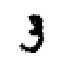

In [37]:
show_image(three_tensors[0])

Next we need to convert our lists of images into rank-3 tensors. In other words, the number of items in the list becomes another dimension of the vector.

*Note: rank is the number of axes or dimensions in a tensor; shape is the size of each axis of a tensor.*

For our 3s for example, we go from a list of 6131, 28x28 tensors, to a 6131x28x28 rank-3 tensor. PyTorch has a built in function called ```stack``` to do this.

Given we need to calculate a mean, we need to cast our integer values to floats, so we do this using the ```float``` casting method. We also divide our integers by 255, since in Machine Learning pixel values are expected to be between 0 and 1.

Finally, we call ```.shape``` on our tensor to make sure the dimensions are as expected.

In [38]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

And to get the rank of the tensor we use:

In [39]:
len(stacked_threes.shape)

3

or

In [40]:
stacked_threes.ndim

3

To calculate the average across our tensors, we can use the ```mean``` function. From the ```.shape``` output above we can see the 0 dimension of our tensor represents the number of images, so it is across this axis we wish to calculate the mean. 

We can also handily visualise the results to see if what we are doing makes sense.

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb0e94539d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb0e9404dd0>)

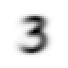

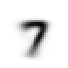

In [41]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)
show_image(mean3), show_image(mean7)

Pretty cool! Dark points represent areas where the images generally agree it should be dark, whilst the blurry grey areas represent disagreement between the images.

Now we have our average representations, we can compare our individual image matrix representations to them.

Whilst initially it might seem as simple as taking one away from the other, we have to remember that some differences will result in positive numbers (black areas minus white), whilst others will be negative (white areas minus black) - and these summed would cancel each other out.

Instead, to accurately quantify the difference, we can use the absolute value of the difference (known as the L1 norm) or alternatively the square of the difference square rooted (known as the L2 norm). Both produce a positive error number.

Let's calculate both for our first 3 that we've already spent some time with.

In [44]:
our_3 = stacked_threes[0]

dist_3_abs = (our_3 - mean3).abs().mean()
dist_3_sqr = ((our_3 - mean3)**2).mean().sqrt()

dist_7_abs = (our_3 - mean7).abs().mean()
dist_7_sqr = ((our_3 - mean7)**2).mean().sqrt()

dist_3_abs, dist_3_sqr, dist_7_abs, dist_7_sqr

(tensor(0.1074), tensor(0.1912), tensor(0.1441), tensor(0.2780))

In both cases, the distance between our 3 and our ideal 3 is less than the distance between our 3 and our ideal 7. So already, our model appears to give a correct prediction (albeit in a 50/50). Let's test on our first 7 as well.

In [45]:
our_7 = stacked_sevens[0]

dist_3_abs = (our_7 - mean3).abs().mean()
dist_3_sqr = ((our_7 - mean3)**2).mean().sqrt()

dist_7_abs = (our_7 - mean7).abs().mean()
dist_7_sqr = ((our_7 - mean7)**2).mean().sqrt()

dist_3_abs, dist_3_sqr, dist_7_abs, dist_7_sqr

(tensor(0.1716), tensor(0.3031), tensor(0.1095), tensor(0.2196))

In this case the distance between our 7 and our ideal 3 is greater than the distance betwen our 7 and our ideal 7. Another correct prediction.

Note: PyTorch already provides these loss functions in ```torch.nn.functional``` which are slightly cleaner to use as illustrated below. We can see the values match.

In [48]:
F.l1_loss(our_7, mean3), F.mse_loss(our_7,mean3).sqrt()

(tensor(0.1716), tensor(0.3031))

Now our initial sense checked has passed, we want to calculate the actual performance on our validation set. Since error alone is not a good way for humans to understand our performance, we instead measure accuracy. That is, what percentage of our validation images did the model categorise correctly.

To begin with, we must get our validation data sets into tensors in the correct format.

In [53]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid/3').ls()])
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid/7').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

As we're going to be calculating the difference between two 'numbers' multiple times, we write a function to handle this.

```mean((-1,-2))``` represents taking the mean over the last and second last dimensions (in our tensors this is the x and y axis of the image).

In [54]:
def mnist_dist(a, b): return (a-b).abs().mean((-1,-2))
mnist_dist(our_7, mean3)

tensor(0.1716)

So our function works for one example, but what happens if we pass it our tensor of validation images.

In [56]:
valid_3_dist = mnist_dist(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1745, 0.1193, 0.1334,  ..., 0.1181, 0.1370, 0.1406]),
 torch.Size([1010]))

Instead of throwing an error, PyTorch uses something called broadcasting. This is where PyTorch automatically expands the tensor with the smaller rank to have the same size as the one with the larger rank.

In other words, mean3 moves from being a 28x28 tensor to a 1010x28x28 tensor, where each of the 28x28 images are identical for all 1010 values across the 0 dimension.

This process doesn't take up additional memory, it is simply implied. Also worth noting, this calc is done in C and on the GPU if you are using CUDA.

Stepping through the mnist_dist function for this calculation:-
* a-b - uses broadcasting to subtract mean from every image in our validation set. (We now have a 1010x28x28 tensor).
* .abs() - takes the absolute value of every element of our tensor. (We now have a 1010x28x28 tensor).
* .mean((-1,-2)), takes the mean across all the values in our last and second to last dimension, in this case our height (28) and width (28) dimensions. (We now have a 1010 tensor).

Knowing all this allows us to write a function to output our results across an entire validation set. Given we only have two classes, we can write a function called is_3, knowing that if it returns false, this is equivalent to it being a 7.

In [61]:
def is_3(x): return mnist_dist(x , mean3) < mnist_dist(x, mean7)

We can test this on our example cases from earlier, the first 3 and first 7 in our training set.

In [63]:
is_3(three_tensors[0]), is_3(seven_tensors[0])

(tensor(True), tensor(False))

It works! ```is_3``` returns True for our first 3 and False for our first 7. Using broadcasting, we are able to perform the same calculation on our entire validation set.

Given a Boolean converted to a float is 0 (False) or 1 (True), we can actually take the mean of our resulting tensors to get the accuracy.

In [71]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()
accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s) / 2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

Pretty good results for a really basic model. 91.7% accuracy on 3s, 98.5% accuracy on 7s and 95.1% accuracy overall.

This gives us a good benchmark to see if we can take our performance to the next level.

### Model 2: Stochastic Gradient Descent

Our above example doesn't allow for any improvement in performance, outside of expanding the training set. There is no way for it to get better and better by adjusting parameters. In order to take advantage of deep learning, we need to come up with a function which has weights that can be updated.

A sensible approach in this case would be a function that represents each pixel as having a weight, with that weight being higher for those pixels most likely to be white (remember in MNIST our background is black and writing is white) for a particularly category.

For example:

```def pr_three(x, w) = (x * w).sum()```

In the above example, X represents our image, in this case a vector. Previously we've regarded our image as a 28x28 tensor, but if we stack up all the rows in a single line, we end up with a 784 vector (which can still be called a tensor).

Likewise, W represents our weights. We can gradually update these weights, making them a little bit better each time, until they are able to best predict if a given image is a 3 or not.

The process is as follows:-
1. Initialise the weights.
2. For each image use these weights to predict whether the image is a 3 or 7.
3. Based on these predictions, calculate the model's performance (its loss).
4. Calculate the gradient, which measures for each weight, how changing that weight would change the loss.
5. Step (that is, change) all weights based on that calculation.
6. Go back to step 2, and repeat.
7. Stop - when you decide to (because the model is good enough or you don't want to wait any longer, or performance stops improving).

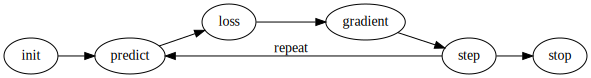

In [191]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

Let's get back to our MNIST sample dataset of 3s and 7s. First we combine our 3s and 7s into the same tensor.

In [75]:
train_x = torch.cat([stacked_threes, stacked_sevens])
train_x.shape

torch.Size([12396, 28, 28])

Next, as explained earlier, we want to flatten our image into a single vector, resulting in a tensor of the form (images, pixel values) where images represents every image and pixel values represents the pixel values in vector form of any given image.

To do this we can use PyTorch's view method, which changes the shape of a tensor without changing its contents. The -1 is a special parameter that says, 'make this axis as big as necessary to fit all the data' rather than setting it to a specific value.

In [76]:
train_x = train_x.view(-1, 28*28)
train_x.shape

torch.Size([12396, 784])

Now we have our image data, but since we have combined 3s and 7s into the same dataset, we need to label those values so our model can calculate the loss. We'll use a 1 for threes and 0 for 7s.

Because we know we have combined our two datasets, we can simply take the length of threes and make the y values 1s, the length of sevens and make them 0s, and then combine. These will match up with our train_x tensor.

In [80]:
train_y = tensor([1]*len(threes) + [0]*len(sevens))
train_y.shape

torch.Size([12396])

For convention, we need to convert this vector into a matrix, in this case of 12396 rows and 1 column. To do this we can use the ```unsqueeze``` method, and specify the position 1 dimension (remember these are zero base).

In [81]:
train_y = train_y.unsqueeze(1)
train_y.shape

torch.Size([12396, 1])

Now we have our data structured in the way we want, we need to combine it into a Dataset that PyTorch can use. It expects to be able to index in to a DataSet and get a tuple of (x, y) returned. We can combine the [```zip```](https://docs.python.org/3.3/library/functions.html#zip) and [```list```](https://docs.python.org/3.3/library/stdtypes.html#typesseq-list) Python functions to achieve this. 

In [85]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y.shape

(torch.Size([784]), torch.Size([1]))

Next we do the same for our validation data.

In [87]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1] * len(valid_3_tens) + [0] * len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))
x, y = valid_dset[0]
x.shape, y.shape

(torch.Size([784]), torch.Size([1]))

Now we need to create our weights tensor. The best way to do this is with an initialisation function, since we want our initial parameters to be random and we don't want to have to repeat that process every time we use this model. 

We also add the requires_grad_() method to tell PyTorch we want to track the gradients of the parameters in this tensor. We'll touch on this in more detail later.

In [122]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28, 1))

A problem with our proposed function of ```x * w``` is that where x (ie the pixel value) is zero, then ```x * w``` will be zero. The gradient will be zero, and the model won't be able to improve. To overcome this problem, we add a bias unit. (Remember from school, the straight line equation of ```y = wx + b```.

In [123]:
bias = init_params(1)

Note, in neural networks, w = weights, b = bias and together these make up the parameters.

Let's go ahead and calculate the loss for one image. Note, .T simply transposes the weights, which is necessary to perform the multiplication.

In [124]:
(train_x[0]*weights.T).sum()+bias

tensor([10.2040], grad_fn=<AddBackward0>)

Clearly we have the option here to loop through every image and sum the results to calculate our overall loss, but this would be very slow. Instead, we use matrix multiplication [(view here if unsure how it works)](https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:matrices/x9e81a4f98389efdf:multiplying-matrices-by-matrices/v/matrix-multiplication-intro), which calculates w * x for every row of the matrix. This is the fundamental mathematical operation that powers all of deep learning.

In Python, matrix multiplication is represented by the ```@``` operator. We create the function below to perform this for an entire DataSet. Note:- ```xb``` refers to x-batch, ie. a mini batch of our training data. No need to worry about what that is for now.

In [125]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[10.2040],
        [ 1.3076],
        [ 6.9170],
        ...,
        [ 8.5185],
        [ 4.9300],
        [ 0.4510]], grad_fn=<AddBackward0>)

To check our accuracy, lets see if our preds results are greater than zero. This confused me at first, but if you look how we initialise our parameters, we use a normal distribution with a standard deviation of 1. So it seems likely that around half of our predictions will be positive and half will be negative. Therefore we pick 0.0 for training efficiency purposes. 

It's worth noting that we could have picked any number for the threshold, but picking 0.0 saves our model from having to 'drag' its values away from where they were initialised to having a mean around a different threshold. The end result and accuracy would be same, it may (although not necessarily) just take a little longer to get there.

In [152]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [127]:
corrects.float().mean().item()

0.4757179617881775

Given we are using a normal distribution with a standard deviation of 1.0 to initialise our weights, it makes sense our model is around 50% accurate (since it has a 50/50 chance of being so).

So what happens when we adjust one of our weights:

In [128]:
weights[0] *= 1.0001
preds = linear1(train_x)
((preds > 0.0).float() == train_y).float().mean().item()

0.4757179617881775

It looks like our weight's gradient is 0 with respect to accuracy. There is a simple explanation for this. Changing the weight for 1 pixel in the image by a tiny amount, will, in most cases, fail to change our model's final prediction. Accuracy is a direct function of this prediction.

So instead, we need a measure of performance that will respond better to minor changes in pixel weightings. We call this a loss function.

Since we know our y values are either 1 or 0, we can simply measure the error as the difference between expected result and prediction. In other words, if our prediction was 0.8, and the y value was 1 (it was 3!) then our loss would be 0.2. If our prediction was 0.8 and the y value was 0 (it was a 7) then our loss would be 0.8.

For this to work, we need to ensure our predictions always lie between 0 and 1. To do that, we can use the sigmoid function.

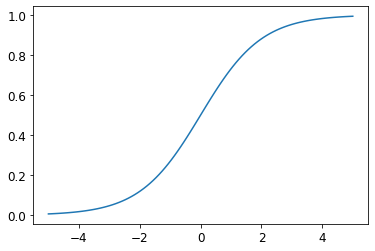

In [130]:
plot_function(torch.sigmoid, min=-5, max=5)

So let's create our loss function. We use ```torch.where``` which is basically a far more efficient CUDA speed list comprehension. In this case our function says if the prediction should be 1, then calculate the loss as 1 - prediction, otherwise set the loss to our prediction, given the only other value is 0 (and so loss would be prediction - 0).

Before passing our values into this function, we run ```.sigmoid()``` to make sure all our predictions fall between 1 and 0.

In [132]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1 - predictions, predictions).mean()

In simple terms, once we introduce this loss function, our model should learn that a higher prediction corressponds to more confidence an image is a 3.

Now we have our data and loss function, we need to train our model. Instead of doing this image by image and calculating the gradients each time, a better approach is to use a mini-batch of images, calculating the average loss for those as a group, and the subsequent gradients. This allows our model to learn through an epoch, not only at the end of an entire epoch.

To pass these batches we use a PyTorch class called a ```DataLoader```. Remember, we already created our Dataset, ```dset``` and Validation Dataset, ```valid_dset``` earlier. We can pass these into ```DataLoader``` with a desired ```batch_size``` to create our ```DataLoaders```.

In [134]:
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=256)

Next let's create a function to calculate our gradients at each step. We pass the function a mini-batch of training data (xb) and labels (yb) along with our model, calculate our predictions, calculate our subsequent loss and then .backward() calculates the gradients on our parameters with respect to that loss function.

The idea is that whenever we call .backward() on a function, it computes the gradient with respect to that function for every parameter which has requires_grad=True. The key word here is EVERY. At first I was wondering how we linked our loss function to our parameters. The answer is, we don't need to, because its done for everything automatically.

In [136]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

Now we're in a position to create our basic training loop. Training a model often takes many epochs. An epoch is simply one full pass through the model of all your training data. Too many epochs and you're likely to overfit your training data, so its important to keep an eye on the direction of your validation metric.

Here the function loops through every mini-batch in our training set, calculating the gradients on our parameters at each step and then adjusting the parameters by those gradients multiplied by a pre-specified learning rate. 

*Note: once we've adjusted our parameters, we zero out our gradients since ```.backward()``` **adds** the gradients to any that are already stored, which is not what we want to do across mini-batches.*

In [164]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

Finally we need functions to calculate our accuracy, and perform this calculation on our validation set after each epoch.

Our ```batch_accuracy``` function takes a batch from our validation data and returns its accuracy, whilst ```validate_epoch``` uses this function when looping through ALL our ```valid_dl``` Dataset to calculate an average of accuracy over all our mini-batches.

In [165]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds > 0.5) == yb
    return correct.float().mean()

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 6)

Now lets re-initialise our parameters.

In [166]:
weights = init_params((28*28,1))
bias = init_params(1)
params = weights, bias

And set our model into action...

In [167]:
epochs_to_train = 20
lr = 1.

for i in range(epochs_to_train):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end='   ')

0.774255   0.898747   0.93486   0.951462   0.956344   0.960251   0.961227   0.9632   0.963689   0.965153   0.965642   0.966618   0.967595   0.968083   0.96906   0.968083   0.968571   0.969568   0.969568   0.969568   

Good progress, 97% accurancy. we're beating our original model after training for just 20 epochs, which took no time at all.

### Model 3: Stochastic Gradient Descent (Again) - with PyTorch.

The above breakdown was really there to aid understanding, the code can be simplified considerably using PyTorch's built in functionality.

The ```nn.Linear``` function replaces both our ```init_params``` ands ```linear``` functions above.

In [153]:
linear_model = nn.Linear(28*28, 1)

Our weights and bias are contained within a single class as shown below:-

In [155]:
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

We can create then an Optimiser class to use this model to train.

In [156]:
class BasicOptim:
    def __init__(self, params, lr): self.params, self.lr = list(params), lr
    
    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr
    
    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

We initialise our Optimiser as follows.

In [157]:
opt = BasicOptim(linear_model.parameters(), lr)

Then we can once again create our training function.

In [168]:
def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

And our training loop.

In [169]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

And we run 20 epochs for this model...

In [161]:
train_model(linear_model, 20)

0.4932 0.7627 0.8554 0.9155 0.9345 0.9477 0.956 0.9633 0.9658 0.9672 0.9697 0.9716 0.9736 0.9746 0.9755 0.9765 0.9775 0.9775 0.978 0.9785 

We get very similar results here again, 98% accuracy.

### Model 4 - Stochastic Gradient Descent (Again, Again) - with fastai v2

fastai provides its own SGD class which does the same as our ```BasicOptim``` class above.

This allows for further simplification.

In [170]:
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.493164 0.765605 0.856894 0.918417 0.935995 0.95162 0.956503 0.962363 0.965781 0.967734 0.970663 0.972617 0.97457 0.975058 0.976035 0.976523 0.977499 0.977988 0.978476 0.978476 

Again, the same result.

### Model 5 - Stocashtic Gradient Descent - fastai v2 Learner

We can again reduce the code required by using fastai's ```Learner``` class. This reduces the need for our training functions / loop. We must first create ```DataLoaders```  which pass fastai batches of our data. We then create our ```Learner``` by passing in our Dataloaders, the model, the optimisation function, the loss function and (optionally) our metrics.

In [181]:
dls = DataLoaders(dl, valid_dl)
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(20, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636961,0.503404,0.495584,00:00
1,0.494130,0.196144,0.835132,00:00
2,0.182421,0.174930,0.843474,00:00
3,0.080600,0.104251,0.912169,00:00
4,0.043039,0.076627,0.934740,00:00
5,0.028333,0.061650,0.947988,00:00
6,0.022267,0.052274,0.956330,00:00
7,0.019558,0.045992,0.963199,00:00
8,0.018177,0.041555,0.965653,00:00
9,0.017346,0.038275,0.967125,00:00


Again, less code, same results, around 98% accuracy.

### Model 6 - Stochastic Gradient Descent - Adding a Non-linearity

So far, all our models have used a simple linear classifier. To add complexity to our model, enabling it to perform more detailed tasks, we need can add a non-linearity between two linear classifiers (since two linear classifiers on their own can be simplified into a single linear classifier). It is this basic concept that gives us the foundation of a very simple neural network.

This simple neural network can be summarised as:-
```
neural_net = xb@w1 + b1
neural_net = neural_net.max(tensor(0.0))
neural_net = neural_net@w2 + b2
```

That's really all there is to it. Lines 1 and 3 represent linear classifiers which we are already familiar with, line 2 represents the ReLU function - a complicated way of saying take the maximum of the value or 0.

So how do we code this model. It can be done in 1 line in PyTorch. ```nn.Sequential``` creates a module which calls each of the listed layers in turn.

*Note: The 30s in the below code represent the number of output activations for w1 and input activations for w2. These are in effect our features. So the model can construct 30 different features, each representing a different mix of pixels, and pass them as inputs (after running through the ReLU function) to the following layer. The higher this number, the higher the complexity of the model.*

In [183]:
neural_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30,1)
)

Let's see if this helps improve our accuracy. We do train for more epochs here, but use a much lower learning rate.

In [184]:
learn = Learner(dls, neural_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.349672,0.389846,0.513248,00:00
1,0.157197,0.239514,0.794897,00:00
2,0.085345,0.117664,0.914132,00:00
3,0.054955,0.078449,0.941119,00:00
4,0.041037,0.060892,0.955348,00:00
5,0.034031,0.051127,0.963690,00:00
6,0.030067,0.044998,0.967125,00:00
7,0.027523,0.040819,0.967125,00:00
8,0.025706,0.037790,0.968597,00:00
9,0.024309,0.035483,0.971050,00:00


Our accuracy has increased to above 98%! 

### Model 7 - Stochastic Gradient Descent - ResNet18

We needn't stop there. Whilst simplicity is typically preferred, its been proven that networks with a higher number of smaller layers get better than results that those with a lower number of larger layers. This also has an efficiency benefit, with these models being faster to train.

As a final approach, let's train a model with 18 layers. We are using an architecture called resnet18, and a cross entropy loss function, but we won't go into detail on those here. The purpose is to see the additional accuracy that can be achieved using these deeper networks.

In [189]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.088288,0.008928,0.997547,00:06


99.75% accuracy after one epoch. Not bad!

### Summary

We've seen many different applications of the same solution, whilst also upping the complexity towards the end to understand the performance improvements.

The next step is to take what we have learned and apply it to the full MNIST training set, for digits 0 thru 9.